# Lab 4: Digital Filtering and Audio Equalizer

## Christian Lancaster and Jade Cutter

### EE 341, Summer 2020

## Lab 4
- Implement a moving average filter
- Analyze the characteristics of filters
- Implement the 3-band equalizer

### Import the important packages

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import simpleaudio as sa
from scipy.io import wavfile

## Task 1: Moving Average Filter

### Moving Average Filter Example
We show an example of how to implement moving average filter using `signal.lfilter` and `signal.convolve`.

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


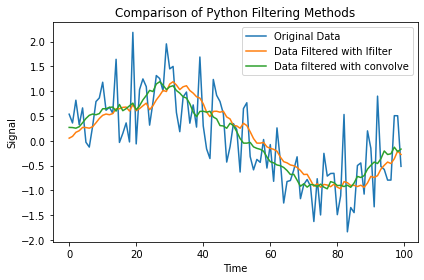

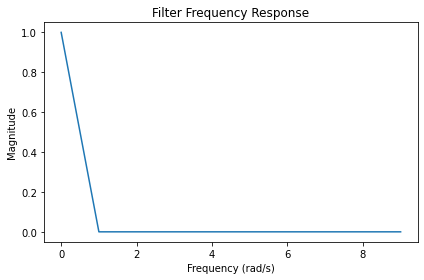

In [9]:
# Load the 100-second signal
data = np.genfromtxt('signal_data.txt')

# Create the impulse response. In this example, we have h[𝑛]= 1/10*(𝑢[𝑛]−𝑢[𝑛−10])
h = np.ones(10) / 10

# Apply this filter to the 100-second signal using both lfilter and convolve.
y_lfilter = signal.lfilter(h, 1, data)
y_convolve = signal.convolve(data, h, mode='same') / sum(h)

# Plot the filtering results
plt.figure()
plt.plot(data)
plt.plot(y_lfilter)
plt.plot(y_convolve)
plt.title('Comparison of Python Filtering Methods')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(['Original Data', 'Data Filtered with lfilter', 'Data filtered with convolve'])
plt.tight_layout()

# Show the system frequency response
plt.figure()
plt.plot(np.fft.fft(h))
plt.title('Filter Frequency Response')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

### Moving Average Filter

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


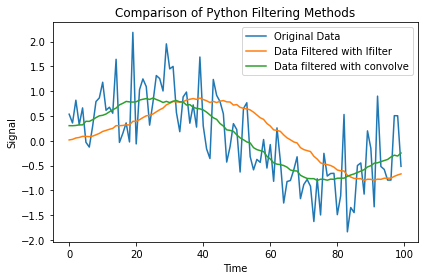

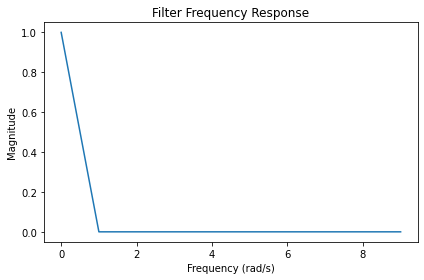

In [10]:
# Load the 100-second signal
data2 = np.genfromtxt('signal_data.txt')

# Create the impulse response. In this example, we have h[𝑛]= 1/30*(𝑢[𝑛]−𝑢[𝑛−30])
h2 = np.ones(30) / 30

# Apply this filter to the 100-second signal using both lfilter and convolve.
y_lfilter2 = signal.lfilter(h2, 1, data2)
y_convolve2 = signal.convolve(data2, h2, mode='same') / sum(h2)

# Plot the filtering results
plt.figure()
plt.plot(data2)
plt.plot(y_lfilter2)
plt.plot(y_convolve2)
plt.title('Comparison of Python Filtering Methods')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(['Original Data', 'Data Filtered with lfilter', 'Data filtered with convolve'])
plt.tight_layout()

# Show the system frequency response
plt.figure()
plt.plot(np.fft.fft(h))
plt.title('Filter Frequency Response')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

### Classic Filter Designs (Butterworth)
Use Butterworth design to make IIR Filter.

In [11]:
# Creating the Butterworth filter
# b, a = signal.butter(order, W, 'lowpass')

### FIR Filter
Use window-method design to make FIR Filter.

In [12]:
# Lowpass:
#b = signal.firwin(num_taps, W)
# Highpass:
#b = signal.firwin(num_taps, W, pass_zero = False)

### Discussion 1

#### Problems Encountered
No problems were encountered in this section; the instructions and the given templates were very clear.

#### Results
##### **1. Does the filtered result look smoother?**

The filtered result looks much smoother than the input waveform, and as more samples are included in the moving average filter, the smoothness increases.

##### **2. Explain the differences in the results of the two implementations.**

The two implementations (lfilter vs. convolve) are phase shifted from one another. As the sample size increases, the phase difference also increases.

##### **3. How would you adjust the implementations so that they give identical results?**

We would adjust the implementation by time shifting the output of the lfilter implementation so that it corresponds with the output of the convolve implmentation. It was observed that the convolved signal remains fixed in place, while the lfilter implementation tends to slide forward as the sample size increases.

#### Implementation Details
Given in the example, we used the known functions to perform the filtering operations.

## Task 2:  Analyze the Characteristics of Filters

In this task, you need to analyze the characteristics of different filters.

You will use the `analyze` function provided in Appendix A to analyze the characteristics.


First of all, copy the `analyze` function in Appendix A to a new code cell and execute it.

In [13]:
def analyze(b, a, title):
    b = np.reshape(b, -1)
    a = np.reshape(a, -1)
    fig = plt.figure(figsize=(10, 8))
    fig.suptitle(title, fontsize='x-large')
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    # Plot frequency response
    w, h = signal.freqz(b, a, 1024)
    w_majors = np.array([0, 0.2, 0.4, 0.6, 0.8, 1]) * np.pi
    w_labels = ['0', r'$0.2\pi$', r'$0.4\pi$', r'$0.6\pi$', r'$0.8\pi$', r'$\pi$']
    ax = fig.add_subplot(221)
    ax.plot(w, 20 * np.log10(np.abs(h)))
    ax.set_xticks(w_majors)
    ax.set_xticklabels(w_labels)
    ax.set_title('Magnitude Response')
    ax.set_xlabel('Frequency [rad]')
    ax.set_ylabel('Gain [dB]')
    ax = fig.add_subplot(222)
    ax.plot(w, np.rad2deg(np.unwrap(np.angle(h))))
    ax.set_xticks(w_majors)
    ax.set_xticklabels(w_labels)
    ax.set_title('Phase Response')
    ax.set_xlabel('Frequency [rad]')
    ax.set_ylabel('Phase [deg]')

    # Plot impulse response
    x = np.zeros(50)
    x[0] = 1
    y = signal.lfilter(b, a, x)
    ax = fig.add_subplot(223)
    ax.stem(np.arange(len(y)), y)
    ax.set_title('Impulse Response')
    ax.set_xlabel('Time')
    ax.set_ylabel('Output')

    # Plot poles & zeros
    n_taps = max(len(b), len(a))
    b = np.pad(b, (0, n_taps - len(b)), 'constant')
    a = np.pad(a, (0, n_taps - len(a)), 'constant')
    z, p, k = signal.tf2zpk(b, a)
    ax = fig.add_subplot(224, projection='polar')

    ax.plot(np.angle(p), np.abs(p), 'x')
    ax.plot(np.angle(z), np.abs(z), 'o', markerfacecolor='none')
    lines, labels = ax.set_rgrids([1])
    for line in lines: line.set_color('black')
    ax.set_thetagrids([0, 90, 180, 270], ['Re(z)', 'Im(z)'])
    ax.set_rlabel_position(0)
    ax.spines['polar'].set_visible(False)
    ax.set_title('Poles & Zeros', y=1.1)

In Task 2, you need to analyze the characteristics of 4 filters:
1. Low pass Butterworth filter
2. Low pass Window-method filter
3. High pass Butterworth filter
4. High pass Window-method filter

Here, we show the example of analyzing (1) Low Pass Butterworth filter and (2) Low Pass window-method filter.

### Low-Pass IIR via Butterworth (Example)

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

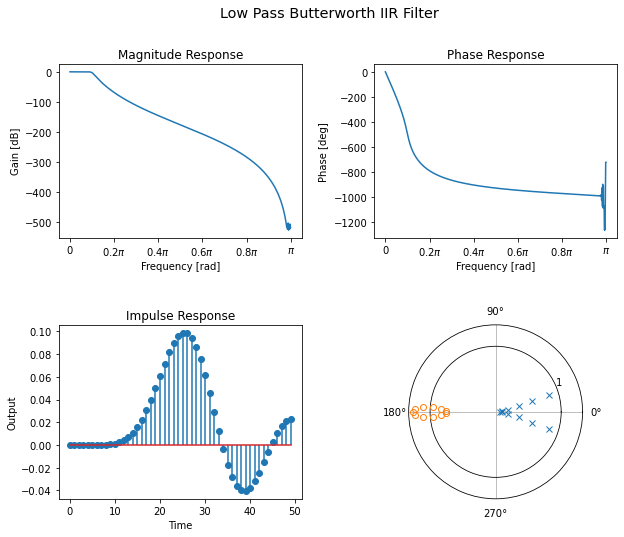

In [14]:
# Each filter should have an order of 10 and a cutoff frequency of ω=0.1𝜋.
order = 10

# Low Pass Butterworth filter
b, a = signal.butter(order+1, 0.1, 'lowpass')
# Use the analyze function
analyze(b, a, 'Low Pass Butterworth IIR Filter')

### Low-Pass FIR via Window-Method (Example)

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

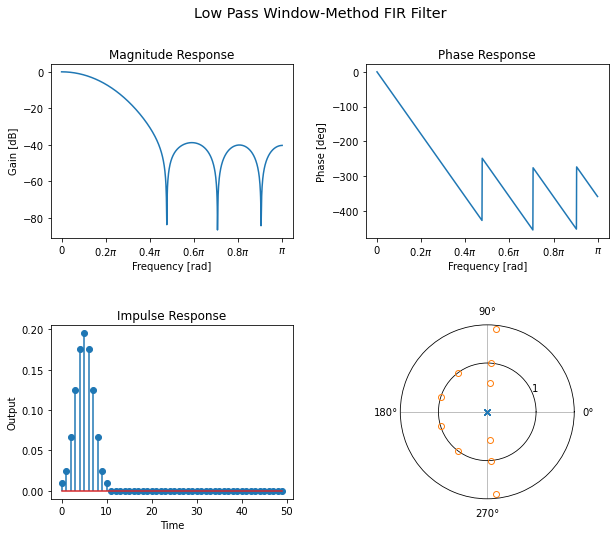

In [15]:
# Each filter should have an order of 10 and a cutoff frequency of ω=0.1𝜋.
order = 10

# Low Pass window-method filter
b = signal.firwin(order+1, 0.1)
# Use the analyze function
analyze(b, 1, 'Low Pass Window-Method FIR Filter')

### High-Pass IIR via Butterworth

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

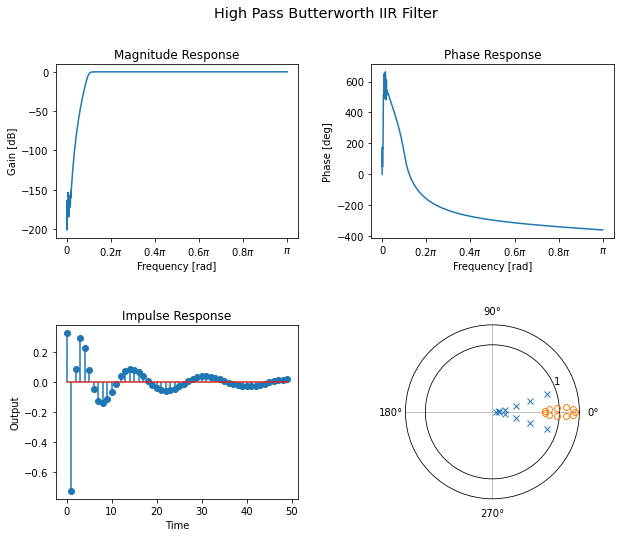

In [16]:
# Each filter should have an order of 10 and a cutoff frequency of ω=0.1𝜋.
order = 10

# High Pass IRR via Butterworth filter
b, a = signal.butter(order+1, 0.1, 'highpass')

# Use the analyze function
analyze(b, a, 'High Pass Butterworth IIR Filter')

### High-Pass FIR via Window-Method

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

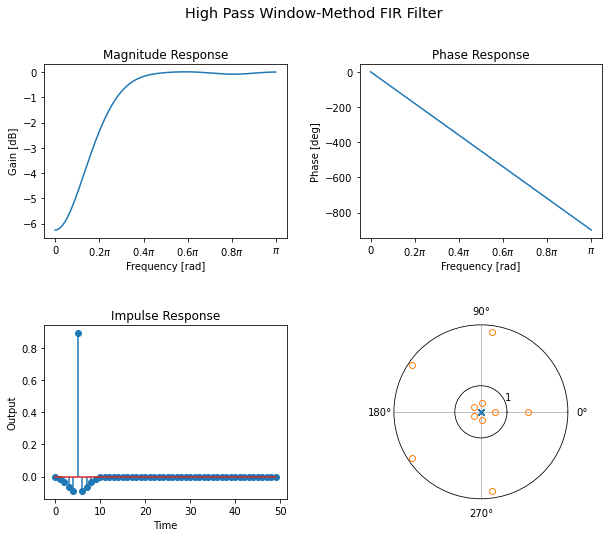

In [17]:
# Each filter should have an order of 10 and a cutoff frequency of ω=0.1𝜋.
order = 10

# High Pass window-method filter
b = signal.firwin(order+1, 0.1, pass_zero='highpass')
# Use the analyze function
analyze(b, 1, 'High Pass Window-Method FIR Filter')

### Apply Filters to Stock Data
Apply all four filters to data in `microsoft_stock.txt` and plot together.

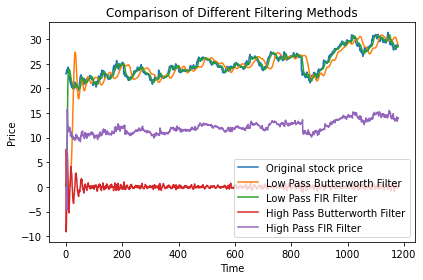

In [18]:
# Load the Microsoft stock data
data1 = np.genfromtxt('microsoft_stock.txt')

# Low Pass Butterworth filter
b, a = signal.butter(11, 0.1, 'lowpass')
# Apply the filter to the stock data
y_butterlow1 = signal.lfilter(b, a, data1)

# Low Pass window-method filter
b = signal.firwin(11, 0.1)
# Apply the filter to the stock data
y_firlow1 = signal.lfilter(b, 1, data1)

# High Pass Butterworth filter
b, a = signal.butter(11, 0.1, 'highpass')
# Apply the filter to the stock data
y_butterhigh1 = signal.lfilter(b, a, data1)

# High Pass window-method filter
b = signal.firwin(11, 0.1, pass_zero='highpass')
# Apply the filter to the stock data
y_firhigh1 = signal.lfilter(b, 1, data1)

plt.figure()
plt.plot(data1)
plt.plot(y_butterlow1)
plt.plot(y_firlow1)
plt.plot(y_butterhigh1)
plt.plot(y_firhigh1)
plt.title('Comparison of Different Filtering Methods')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Original stock price','Low Pass Butterworth Filter', 'Low Pass FIR Filter', 'High Pass Butterworth Filter', 'High Pass FIR Filter'])
plt.tight_layout()
plt.show()

### Apply Filters to Pulse Data
Apply all four filters to a pulse of length 20: 𝑥[𝑛]=𝑢[𝑛]−𝑢[𝑛−20]

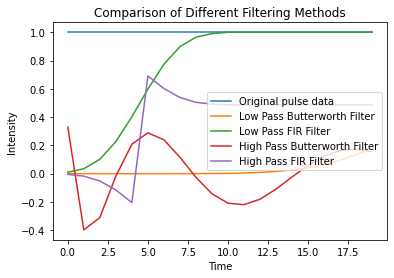

In [19]:
# Load the pulse data
#data2 = 𝑥[𝑛]=𝑢[𝑛]−𝑢[𝑛−20]
n = np.arange(0, 20)
u_t0 = np.heaviside(n, 1)
u_t1 = np.heaviside(n-20, 1)
data2 = u_t0 - u_t1
np.concatenate([data2, np.zeros(40)])

# Low Pass Butterworth filter
b, a = signal.butter(11, 0.1, 'lowpass')
# Apply the filter to the stock data
y_butterlow2 = signal.lfilter(b, a, data2)

# Low Pass window-method filter
b = signal.firwin(11, 0.1)
# Apply the filter to the stock data
y_firlow2 = signal.lfilter(b, 1, data2)

# High Pass Butterworth filter
b, a = signal.butter(11, 0.1, 'highpass')
# Apply the filter to the stock data
y_butterhigh2 = signal.lfilter(b, a, data2)

# High Pass window-method filter
b = signal.firwin(11, 0.1, pass_zero='highpass')
# Apply the filter to the stock data
y_firhigh2 = signal.lfilter(b, 1, data2)

plt.figure()
plt.plot(data2)
plt.plot(y_butterlow2)
plt.plot(y_firlow2)
plt.plot(y_butterhigh2)
plt.plot(y_firhigh2)
plt.title('Comparison of Different Filtering Methods')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend(['Original pulse data','Low Pass Butterworth Filter', 'Low Pass FIR Filter', 'High Pass Butterworth Filter', 'High Pass FIR Filter'], loc='center right')
#plt.tight_layout()
plt.show()

### Discussion 2

#### Problems Encountered
We were unsure how to implement the High Pass Inifinite Impulse Response filter using the window method.

#### Results
##### **1. Comment on the differences in the frequency response of the two filters (magnitude and phase) and how this impacts the outputs.**

We will be comparing FIR filters agains Butterworth filters.
With the Butterworth filters, it can be observed that there are some nonlinear components in the frequency response, which can cause distortions to the output waveform. 

Whereas with the FIR filters, the phase is linear, which preserves more of the input waveform.

We also want to draw attention to the fact that the low-pass FIR filter has some discontinuities at certain frequency values in the Magnitude as well as the Phase of the frequency response. However, this does not seem to adversely affect the output waveform, as the graph shows.

Overall, we would say that the Butterworth filters more closely resemble an ideal filter in terms of the magnitude. Neither filter is particularly close to having an ideal phase response, since it should be zero within the passband for an ideal filter, but the Butterworth is a bit closer to ideal than the FIR filter with it's linear phase.

#### Implementation Details
After getting some help with the lab, it was determined that we only needed to do a high-pass FIR filter using the window method instead of an IIR. Therefore, the only implementation decision was to adjust the input parameters of the firwin function to set it to high-pass mode.

## Task 3: Audio Equalizer

In this section, you will implement an audio equalizer using three different filters. See Figure 1 in the handout for the signal flow of the equalizer.


You will use the `wav_load` and `play` functions provided in the handout to load and play the audio file.


First of all, copy the functions in the handout to a new code cell and execute it.

In [20]:
# Load a WAV file. 
# Return the sampling rate and the sample array. 
def wav_load(file_name): 
    # Load the raw data. 
    sr, data = wavfile.read(file_name) 
    # Only use the first channel. 
    if data.ndim > 1: 
        data = data[:, 0] 
    
    # Convert to float32 quantization. 
    kind = data.dtype.kind 
    bits = data.dtype.itemsize * 8 
    data = data.astype('float32') 
    if kind == 'i' or kind == 'u': 
        data = data / 2 ** (bits - 1) 
        if kind == 'u': 
            data = data - 1 
    return sr, data

def play(samples, sample_rate): 
    sa.play_buffer((np.clip(samples, -1, 1) * 32767).astype('int16'), 1, 2, sample_rate).wait_done()

Then, implement the equalizer by writing a function `equalizer` including 4 steps:

1. take a sound signal and the gain terms 𝐺1,𝐺2 and 𝐺3 as inputs
2. apply the filters
3. multiply the filter outputs by the gain terms
4. sum the results

You should use the function `signal.lfilter` and the filter coefficients provided in Table 1 in the handout. For examle, you can apply a filter by using `signal.lfilter(b1, a1, samples)`



In addition, the gain terms supplied to the function should be in decibels (dB). For example, if the gain term is 0 dB, it means that

   sound level = 20 log ($p_{measured}/p_{reference}$) = 20 log 1 = 0 dB
                                  
This level occurs when the measured intensity $p_{measured}$ is equal to the reference level $p_{reference}$.


In [21]:
def equalizer(samples, g1, g2, g3):
    #bandpass
    b1 = [11.713, 0, -23.4257, 0, 11.713] 
    a1 = [1800, -6656.7, 9341, -5896.1, 1413.4]
    #lowpass
    b2 = [0.2982, 0.89471, 0.89471, 0.2982] 
    a2 = [1800, -4989.8, 4625.2, -1433]
    #highpass
    b3 = [688.1, -2752.5, 4128.71, -2752.47, 688.12] 
    a3 = [1000, -3256.6, 4033.77, -2246, 473.51]
    
    # implement the equalizer here
    y1 = signal.lfilter(b2, a2, samples)
    y2 = signal.lfilter(b1, a1, samples)
    y3 = signal.lfilter(b3, a3, samples)
    
    # decibel conversion
    dg1 = 10**(g1/20.0)
    dg2 = 10**(g2/20.0)
    dg3 = 10**(g3/20.0)

    y1 = y1 * dg1
    y2 = y2 * dg2
    y3 = y3 * dg3
    
    return y1 + y2 + y3


In [31]:
# load the audio file
sample_rate, data = wav_load('output.wav')
# play the audio
play(data, sample_rate)

In [43]:
# apply the equalizer, the gain terms 𝐺1 = 𝐺2 = 𝐺3 = 0 dB
new_data = equalizer(data[:int(len(data)/9)], 10, -10, -10)
# verify that it sounds the same as the original input
play(new_data, sample_rate)

In [42]:
# apply the equalizer, the gain terms 𝐺1 = 𝐺2 = 𝐺3 = 0 dB
new_data = equalizer(data[:int(len(data)/9)], -10, 10, -10)
# verify that it sounds the same as the original input
play(new_data, sample_rate)

In [41]:
# apply the equalizer, the gain terms 𝐺1 = 𝐺2 = 𝐺3 = 0 dB
new_data = equalizer(data[:int(len(data)/9)], -10, -10, 10)
# verify that it sounds the same as the original input
play(new_data, sample_rate)

### Discussion 3

#### Problems Encountered
No problems were encountered in this section; the instructions and the given templates were very clear.

#### Results
##### 1. Identify which filter does each set of coefficients in Table 1 correspond to
Discuss how the filtered sound sounds different in at least two different cases.
With the coefficients set to (10, 0, 0), you get a bass boosted sound effect, which sounds like you are in the bathroom of the venue where the band is playing.
With the coefficients set to (0, 10, 0), you get a strong vocal boost sound effect, which amplifies the vocal range over the bass.
With the coefficients set to (0, 0, 10), you get a strong treble boost, which really amplifies the sound of the cymbals and other high frequency components.

#### Implementation Details
For the creation of this method, we first determined which set of coefficients goes with which filter by using the analyze function. The high-pass and low-pass were easy to identify visually, which left the bandpass filter out. It could also be seen that the magnitude response drops off on the high and low ends of the frequency spectrum.
Once those were figured out, we used the filtering technique shown in part II of this lab. Finally, we converted the decibel values to regular numbers so that we could multiply them with the filters, and then sum the outputs.